<a href="https://colab.research.google.com/github/by-thoma/visualization-modeling/blob/main/lab5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Лабораторная работа № 5 Цогоева Т.В. К3220

#Данные


**Датасет**
Student Grade Prediction

**Описание**
  Эти данные об успеваемости учащихся по математике в средней португальской школе. Атрибуты данных включают оценки учащихся, демографические, социальные и связанные со школой характеристики. Они были собраны с помощью школьных отчетов и анкет.
*   Sex - пол студента
*   Age - возраст студента
*   Fedu - образование отца (0 - нет, 1 - начальное образование (4-й класс), 2-окончен 9й класс, 3-среднее, 4 - высшее)
*   Fjob - работа отца
*   Reason - причина поступления в школу
*   Studytime - еженедельное время обучения (1 - 2 часа, 2 - от 2 до 5 часов, 3 - от 5 до 10 часов или 4 - 10 часов)
*   Paid - дополнительные платные занятия(да или нет)
*   Activities - внеклассные мероприятия (да или нет)
*   Higher - хочет получить высшее образование (да или нет)
*   Famrel - качество семейных отношений (от 1 - очень плохо до 5 - отлично)
*   Health - текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)
*   G3 - итоговая оценка (от 0 до 20)

In [ ]:
install.packages('tidyverse')
install.packages('writexl')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
df <- read.csv(file = "student-mat.csv", header = TRUE)

In [ ]:
to.remove <- c('address', 'school','famsize', 'Medu','guardian', 'freetime','failures','G1','G2',
'traveltime','internet','goout','nursery','Walc',"Mjob") 
df <- df[, !colnames(df) %in% to.remove] 
head(df)

,sex,age,Pstatus,Fedu,Fjob,reason,studytime,schoolsup,famsup,paid,activities,higher,romantic,famrel,Dalc,health,absences,G3
,<chr>,<int>,<chr>,<int>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>
1,F,18,A,4,teacher,course,2,yes,no,no,no,yes,no,4,1,3,6,6
2,F,17,T,1,other,course,2,no,yes,no,no,yes,no,5,1,3,4,6
3,F,15,T,1,other,other,2,yes,no,yes,no,yes,no,4,2,3,10,10
4,F,15,T,2,services,home,3,no,yes,yes,yes,yes,yes,3,1,5,2,15
5,F,16,T,3,other,home,2,no,yes,yes,no,yes,no,4,1,5,4,10
6,M,16,T,3,other,reputation,2,no,yes,yes,yes,yes,no,5,1,5,10,15


In [ ]:
df$Pstatus <- factor(df$Pstatus)
df$reason <- factor(df$reason)
df$studytime <- factor(df$studytime)
df$paid <- factor(df$paid)
df$activities <- factor(df$activities)
df$higher <- factor(df$higher)
df$famrel <- factor(df$famrel)
df$sex <- factor(df$sex)
df$Fjob <- factor(df$Fjob)
df$Fedu <- factor(df$Fedu)
head(df)


,sex,age,Pstatus,Fedu,Fjob,reason,studytime,schoolsup,famsup,paid,activities,higher,romantic,famrel,Dalc,health,absences,G3
,<fct>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<chr>,<chr>,<fct>,<fct>,<fct>,<chr>,<fct>,<int>,<int>,<int>,<int>
1,F,18,A,4,teacher,course,2,yes,no,no,no,yes,no,4,1,3,6,6
2,F,17,T,1,other,course,2,no,yes,no,no,yes,no,5,1,3,4,6
3,F,15,T,1,other,other,2,yes,no,yes,no,yes,no,4,2,3,10,10
4,F,15,T,2,services,home,3,no,yes,yes,yes,yes,yes,3,1,5,2,15
5,F,16,T,3,other,home,2,no,yes,yes,no,yes,no,4,1,5,4,10
6,M,16,T,3,other,reputation,2,no,yes,yes,yes,yes,no,5,1,5,10,15


#Описательная статистика


Выведем информацию о датасете и простую описательную статистику.

In [ ]:
summary(df)

 sex          age       Pstatus Fedu          Fjob            reason   
 F:208   Min.   :15.0   A: 41   0:  2   at_home : 20   course    :145  
 M:187   1st Qu.:16.0   T:354   1: 82   health  : 18   home      :109  
         Median :17.0           2:115   other   :217   other     : 36  
         Mean   :16.7           3:100   services:111   reputation:105  
         3rd Qu.:18.0           4: 96   teacher : 29                   
         Max.   :22.0                                                  
 studytime  schoolsup            famsup           paid     activities higher   
 1:105     Length:395         Length:395         no :214   no :194    no : 20  
 2:198     Class :character   Class :character   yes:181   yes:201    yes:375  
 3: 65     Mode  :character   Mode  :character                                 
 4: 27                                                                         
                                                                               
                

In [ ]:
summary(df)[2, 4] # 2 - строка, 4 - столбец

[1] "1: 82  "

In [ ]:
median(df$G3) # медиана

[1] 11

In [ ]:
min(df$G3) # минимум

[1] 0

In [ ]:
max(df$G3) # максимум

[1] 20

In [ ]:
mean(df$G3) # среднее арифметическое

[1] 10.41519

In [ ]:
quantile(df$G3, 0.75) - quantile(df$G3, 0.25) # интерквартильный размах по-простому

75% 
  6

In [ ]:
IQR(df$G3) # интерквартильный размах встроенной функцией

[1] 6

In [ ]:
range(df$G3) # размах

[1]  0 20

In [ ]:
var(df$G3) # дисперсия

[1] 20.98962

In [ ]:
sd(df$G3) # стандартное отклонение

[1] 4.581443

#Простые визуализации

На графике видно, что абсолютное большинство учащихся школы 17-18 летние

In [ ]:
to_plot = as.data.frame(table(df$age))
to_plot = transform(to_plot, Var2=as.numeric(Var1))
to_plot

Var1,Freq,Var2
<fct>,<int>,<dbl>
15,82,1
16,104,2
17,98,3
18,82,4
19,24,5
20,3,6
21,1,7
22,1,8


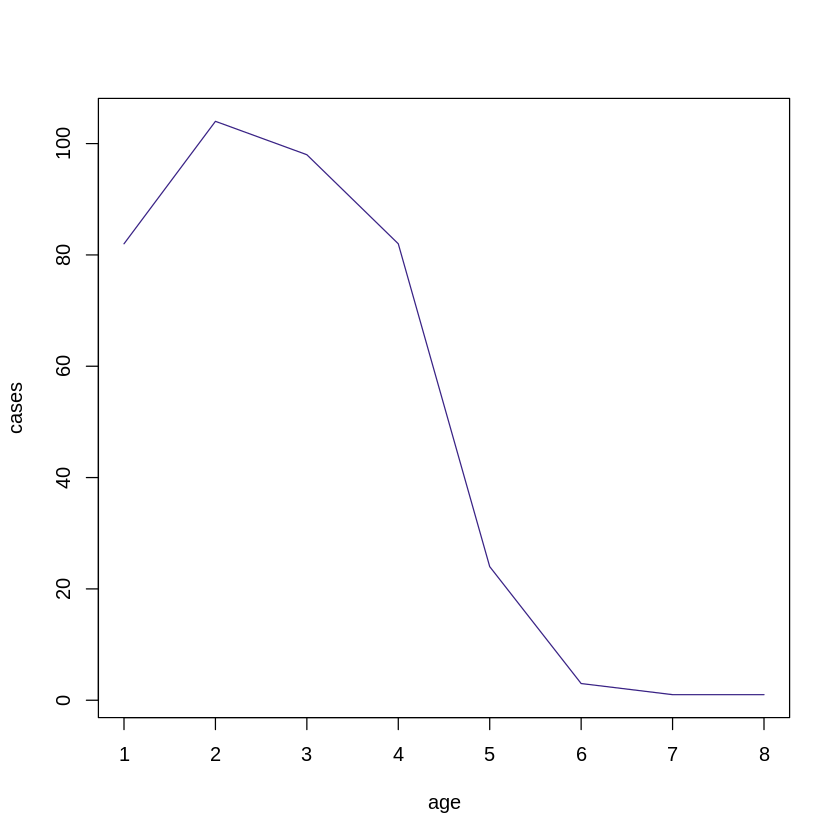

In [ ]:
plot(to_plot$Var2, to_plot$Freq, type="l", col="#392285", xlab="age", ylab="cases")

Посмотрим среднюю успеваемость учеников школы. Получилось 10 баллов

In [ ]:
to_plot = as.data.frame(table(df$G3))
to_plot = transform(to_plot, Var1=as.numeric(Var1))
head(to_plot)

,Var1,Freq
,<dbl>,<int>
1,1,38
2,2,1
3,3,7
4,4,15
5,5,9
6,6,32


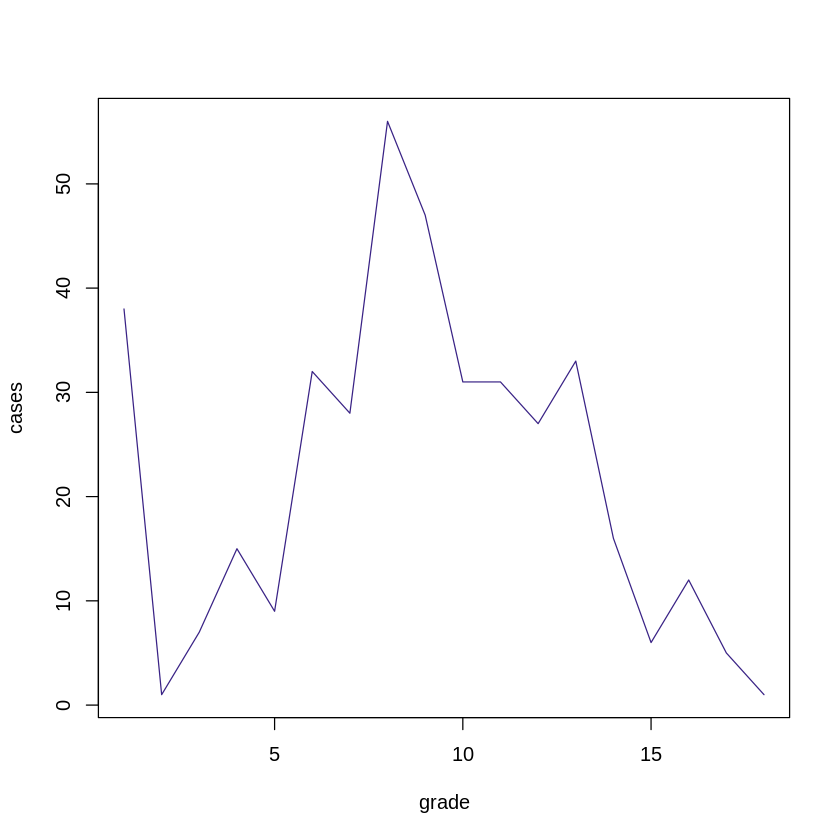

In [ ]:
plot(to_plot$Var1, to_plot$Freq, type="l", col="#392285", xlab="grade", ylab="cases")

Предположим, что большинство учеников собираются поступать в вуз и попытаемся выяснить причину среднего балла по школе ниже среднего.

In [ ]:
university = subset(df, higher=="yes")
work = subset(df, higher=="no")
nrow(university)/nrow(df)*100 #процент поступающих в вуз
nrow(work)/nrow(df)*100 # процент тех, кто не идет
ncol(university)

[1] 94.93671

[1] 5.063291

[1] 18

Построим круговую диаграмму и визуализируем результат

In [ ]:
slices = c(nrow(university), nrow(work))
labels = c("university", "work")
pct = round(slices/sum(slices)*100)
labels = paste(labels, pct)
labels = paste(labels, "%", sep="") 

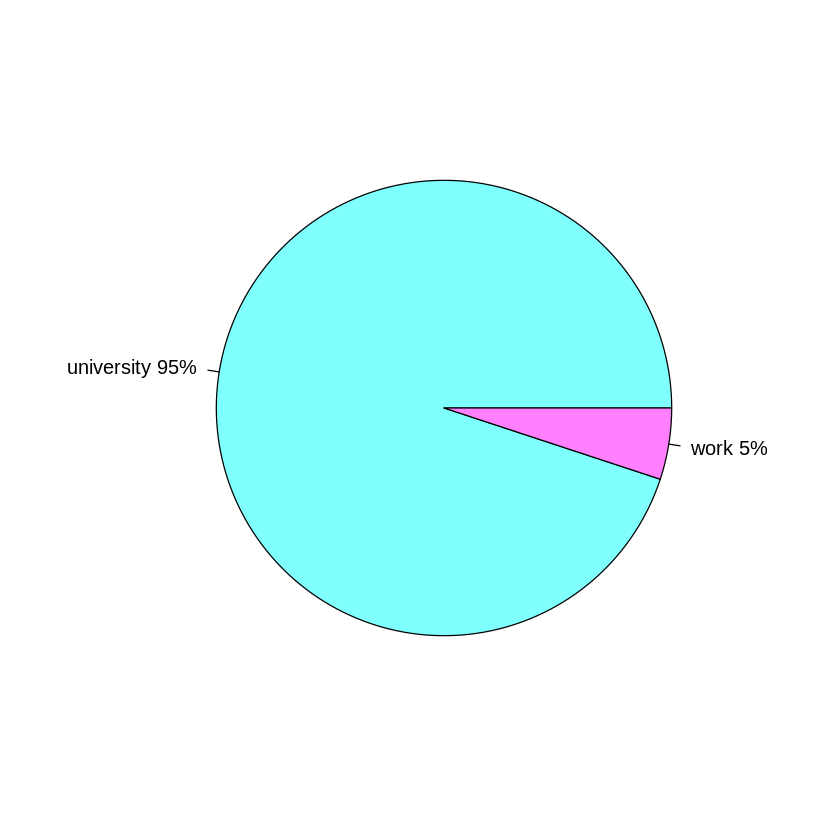

In [ ]:
pie(slices, labels=labels, col=cm.colors(length(labels)))

In [ ]:
install.packages("janitor")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(janitor)

В датасете  есть учащиеся, которым более 19 лет. Предположим, они не собираются поступать в университет

In [ ]:
grouped_age = tabyl(df, age, higher)
grouped_age

age,no,yes
<int>,<dbl>,<dbl>
15,0,82
16,3,101
17,4,94
18,9,73
19,3,21
20,0,3
21,0,1
22,1,0


Есть те, кто заканчивает школу после 20 лет и не собирается поступать, но их намного меньше, чем тех кому 18. В выборке очень мало тех, кто не собирается поступать.

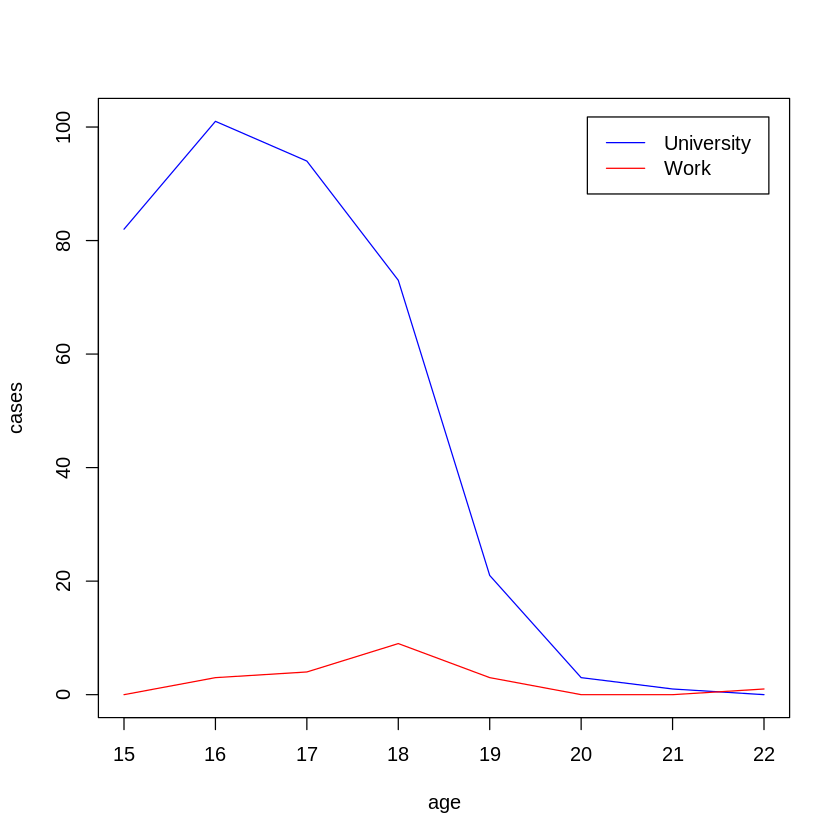

In [ ]:
plot(grouped_age$age, grouped_age$yes, type="l", col="blue", xlab="age", ylab="cases")
lines(grouped_age$age, grouped_age$no, col="red")
legend("topright", inset=.03, legend=c("University", "Work"),
       col=c("blue", "red"), lty=1:1, cex=1)

Предположим, что те, кто собирается получать высшее образование, выбрали школу по качеству учебной программы. 

In [ ]:
counts = t(table(df$reason, df$higher))
counts

     
      course home other reputation
  no      10    3     5          2
  yes    135  106    31        103

In [ ]:
install.packages("wesanderson")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(wesanderson)

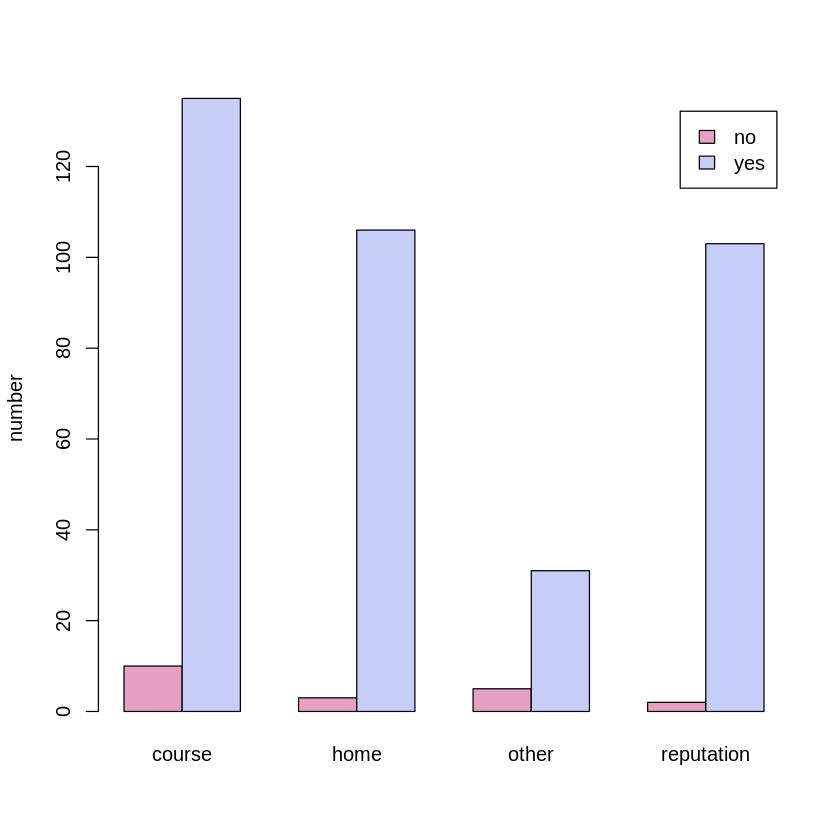

In [ ]:
barplot(counts, ylab="number", col=wes_palette("GrandBudapest2", 2),
  legend = rownames(counts), beside=TRUE)

Предположение подтвердилось. Вторым приоритетом стала близость к дому у тех кто собирается поступать. У тех, кто не собирается, на втором месте другие причины

Рассмотрим ближе тех, кто не собирается поступать

In [ ]:
work = subset(df, higher=="no")
work

,sex,age,Pstatus,Fedu,Fjob,reason,studytime,schoolsup,famsup,paid,activities,higher,romantic,famrel,Dalc,health,absences,G3
,<fct>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<chr>,<chr>,<fct>,<fct>,<fct>,<chr>,<fct>,<int>,<int>,<int>,<int>
79,M,17,T,1,other,home,1,yes,yes,no,yes,no,no,4,1,3,2,10
128,F,19,T,1,other,course,2,no,yes,no,no,no,no,3,1,5,2,9
149,M,16,T,4,teacher,course,1,no,yes,no,no,no,yes,3,2,5,0,0
151,M,18,T,1,other,course,1,no,no,no,no,no,yes,2,2,4,0,0
154,M,19,T,2,at_home,home,1,no,yes,no,no,no,yes,4,1,4,0,0
161,M,17,T,1,other,course,1,no,no,no,yes,no,yes,3,2,5,0,0
164,M,17,T,3,services,course,1,no,no,no,no,no,no,5,1,2,2,10
165,M,17,T,1,services,course,2,no,no,no,yes,no,yes,5,1,5,0,7
166,M,16,T,2,services,course,1,no,yes,no,yes,no,no,4,1,2,16,12


Предположим, они не собираются получать высшее образование, потому - что в их семье другие ценности. Посмотрим, у кого из них родители не имеют высшего образования (рассмотрим одного родителя).

In [ ]:
counts = t(table(work$Fedu))
counts

      
        0  1  2  3  4
  [1,]  0 10  7  2  1

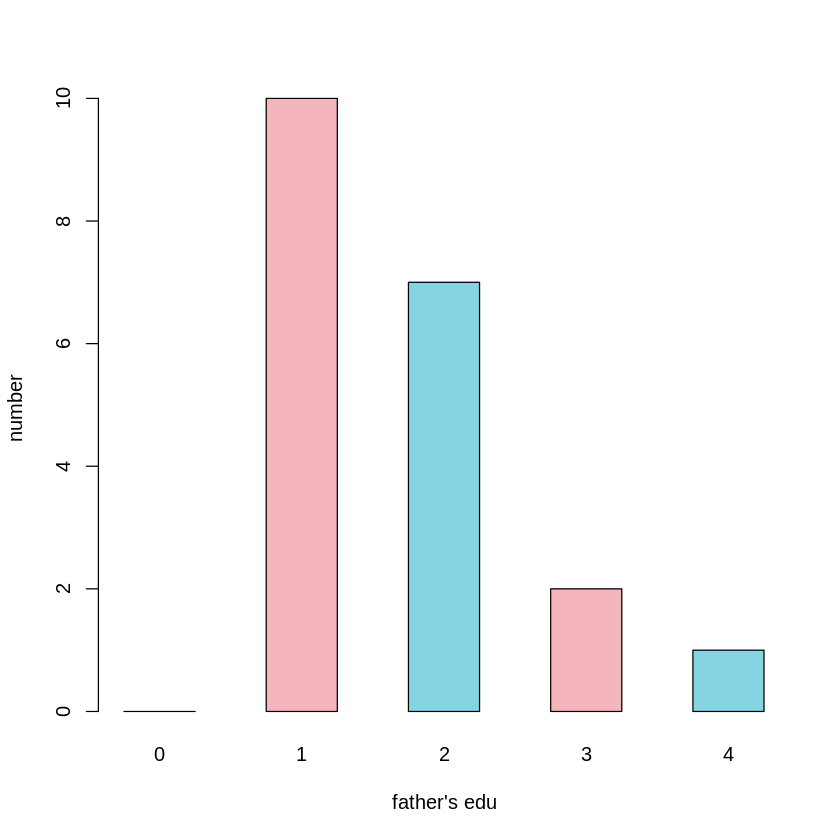

In [ ]:
barplot(counts, ylab="number", xlab = "father's edu", col=wes_palette("Moonrise3", 2),
  legend = rownames(counts), beside=TRUE)

По данной диаграмме видно, что абсолютное большинство имеет только начальное образование (4 класса), высшее образование (4 пункт) только у 1 родителя.

In [ ]:
university = subset(df, higher=="yes")
head(university)

,sex,age,Pstatus,Fedu,Fjob,reason,studytime,schoolsup,famsup,paid,activities,higher,romantic,famrel,Dalc,health,absences,G3
,<fct>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<chr>,<chr>,<fct>,<fct>,<fct>,<chr>,<fct>,<int>,<int>,<int>,<int>
1,F,18,A,4,teacher,course,2,yes,no,no,no,yes,no,4,1,3,6,6
2,F,17,T,1,other,course,2,no,yes,no,no,yes,no,5,1,3,4,6
3,F,15,T,1,other,other,2,yes,no,yes,no,yes,no,4,2,3,10,10
4,F,15,T,2,services,home,3,no,yes,yes,yes,yes,yes,3,1,5,2,15
5,F,16,T,3,other,home,2,no,yes,yes,no,yes,no,4,1,5,4,10
6,M,16,T,3,other,reputation,2,no,yes,yes,yes,yes,no,5,1,5,10,15


Вернемся к основной массе и попытаемся узнать, какие факторы влияют на итоговую успеваемость

Предположим, лучше учатся те, кто ходит на дополнительные платные курсы


In [ ]:
counts = t(table(university$G3, university$paid))
counts

     
       0  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20
  no  24  0  5  9  6  8 14 23 21 17 13 14 14 12  5  6  3  1
  yes  8  1  2  6  2 20 12 30 26 11 17 13 19  4  1  6  2  0

In [ ]:
grouped_paid = tabyl(university, paid)
grouped_paid

paid,n,percent
<fct>,<dbl>,<dbl>
no,195,0.52
yes,180,0.48


In [ ]:
paid = subset(university, paid=="yes")
Paid = t(table(paid$G3))
Mg = mean(paid$G3) # средние оценки тех, кто ходит на курсы
free = subset(university, paid=="no")
Free = t(table(free$G3)) 
Mgfree = mean(free$G3)# тех, кто изучает материал самостоятельно
Mg
Mgfree

[1] 10.91667

[1] 10.32308

Средние оценки у этих 2х групп практически одинаковые. Получается, предположение ошибочно и те, кто проходит платные курсы успевают не лучше, чем те, кто изучает материал самостоятельно

Подтвердим этот результат. Построим круговую диаграмму на данных об оценках 2х этих групп учащихся

In [ ]:
slices = c(nrow(Paid), nrow(Free))
labels = c("paid couses", "independent learning")
pct = round(slices/sum(slices)*100)
labels = paste(labels, pct)
labels = paste(labels, "%", sep="") 

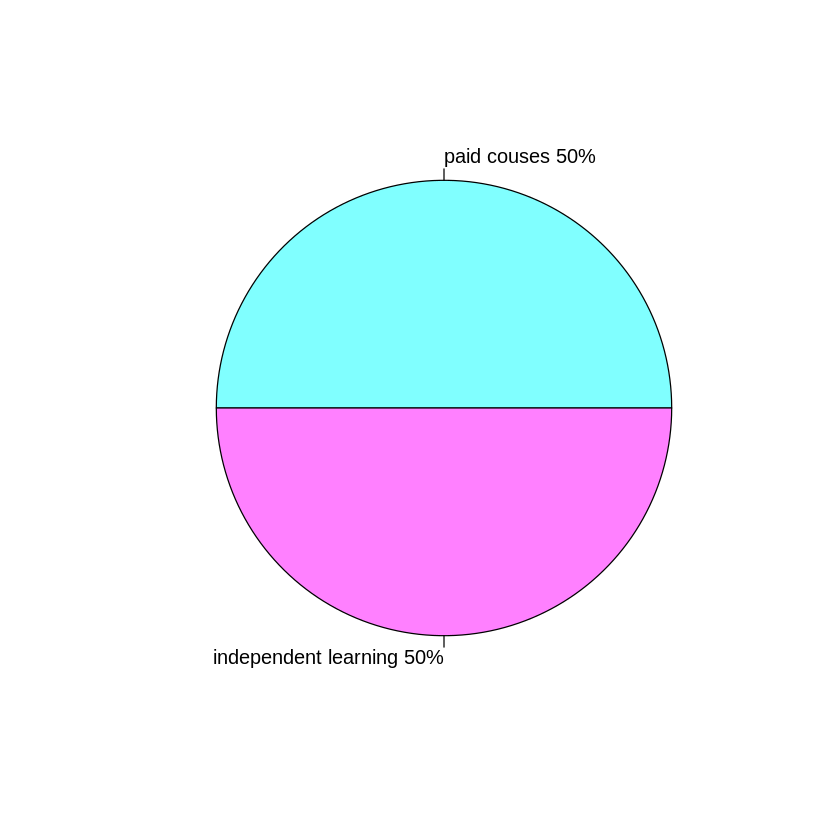

In [ ]:
pie(slices, labels=labels, col=cm.colors(length(labels)))

In [ ]:
install.packages("ggplot2") 
library(ggplot2)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Возможно, есть зависимость между итоговыми оценками и количеством пропусков

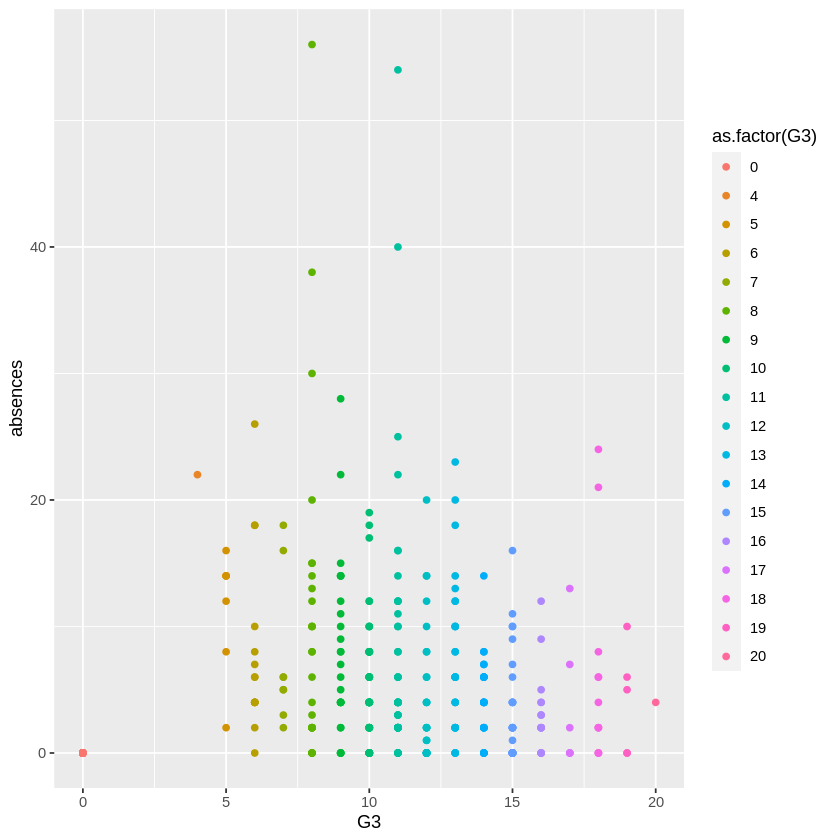

In [ ]:
ggplot(data = university, mapping = aes(x = G3, y = absences, color = as.factor(G3))) + geom_point()

Большинство тех, у кого количество пропусков больше 30 за год, имеют успеваемость ниже среднего, однако есть и исключения. Те, у кого самые высокие оценки в общей массе пропустили менее 10 занятий. 

Поищем зависимость между оценками и наличием хобби, занятия спортом.

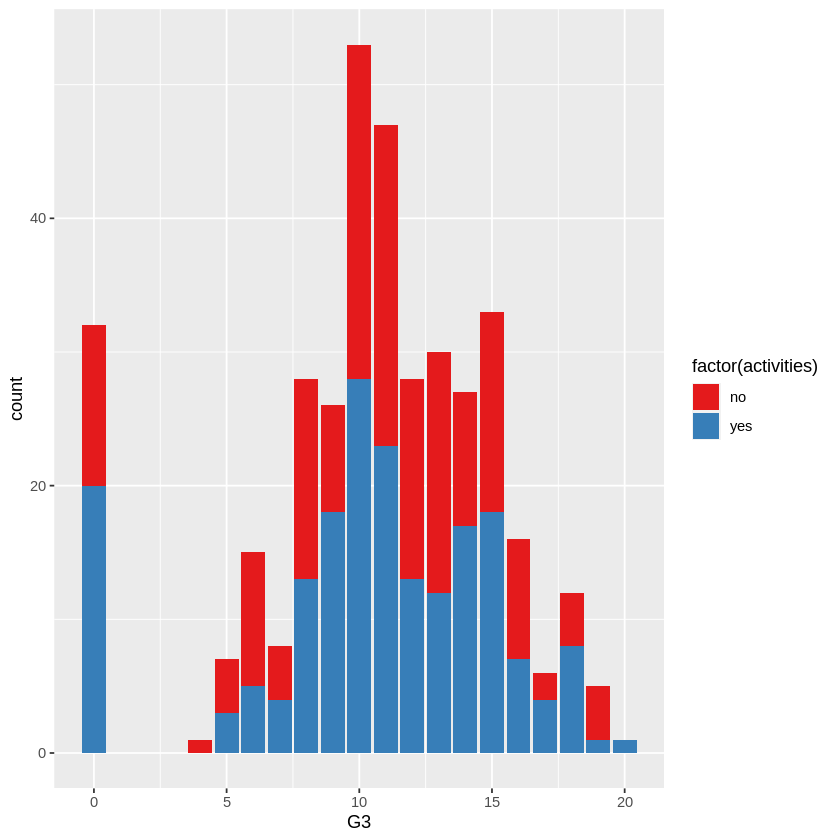

In [ ]:
ggplot(university, aes(x = G3, fill = factor(activities))) +
  geom_bar() +
  scale_fill_brewer(palette = "Set1") 

Наличие хобби не особо влияет на успеваемость учеников

Возможно, есть зависимость между состоянием здоровья ученика и временем, которое он затрачивает на учебу.

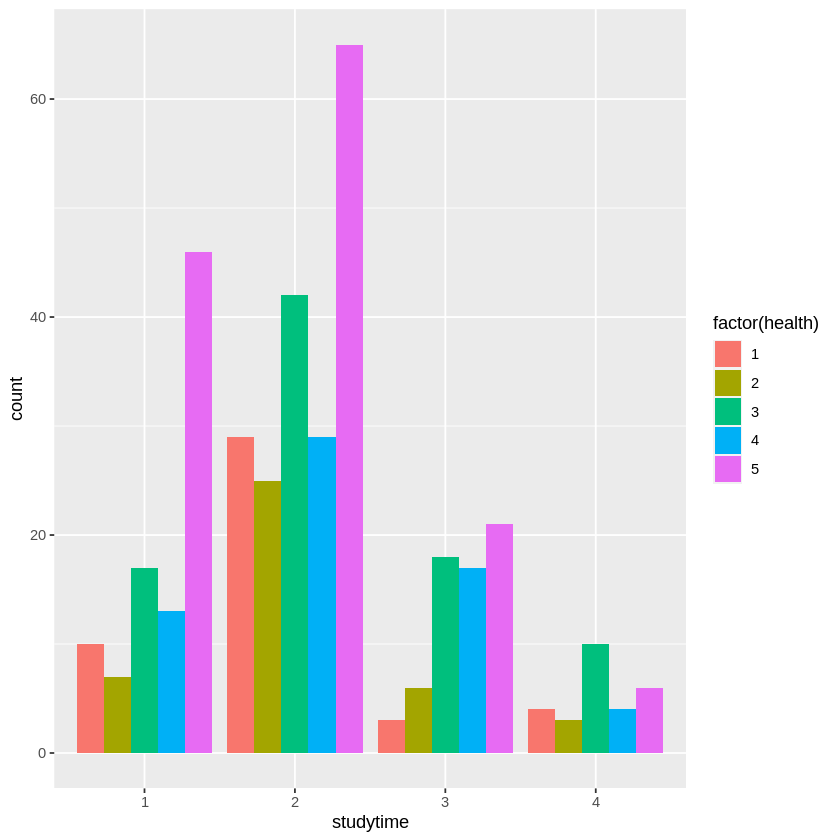

In [ ]:
ggplot(university, aes(x = studytime, fill = factor(health))) +
  geom_bar(position='dodge')

Большинство учеников занимаются от 2 до 5 часов в неделю. 
Причина успеваемости ниже средней выявлена.

Возможно, это обусловлено нехваткой поддержки, внимания со стороны администрации школы, учителей.

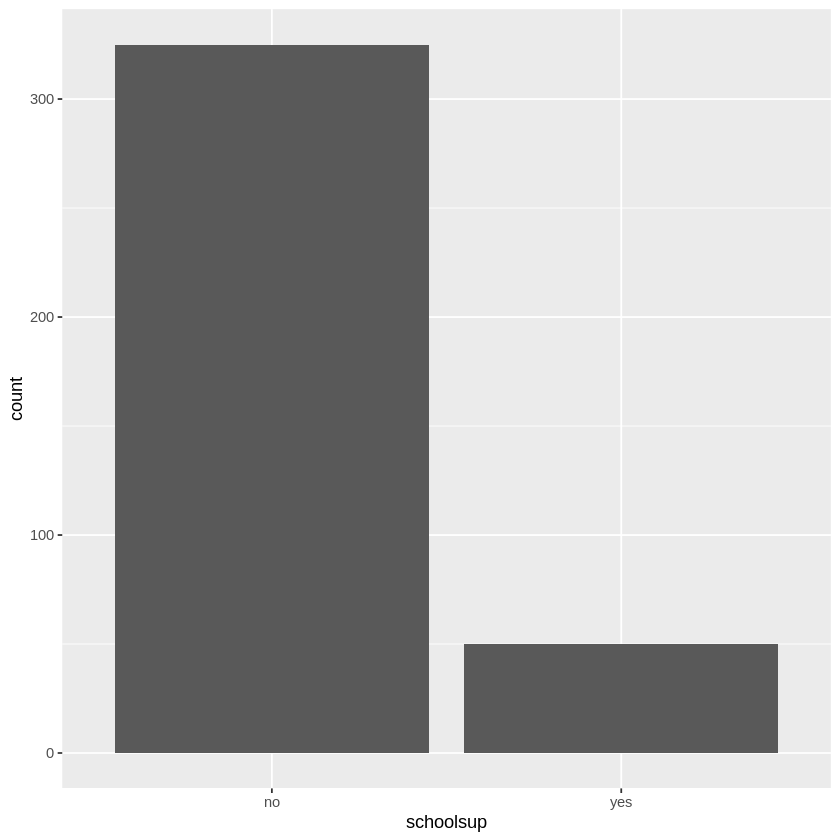

In [ ]:
ggplot(university, aes(x = schoolsup)) +
  geom_bar()

Возможно, одна из проблем в том, что школа не оказывает должной образовательной поддержки

Тогда как большинство семей поддерживают учеников.

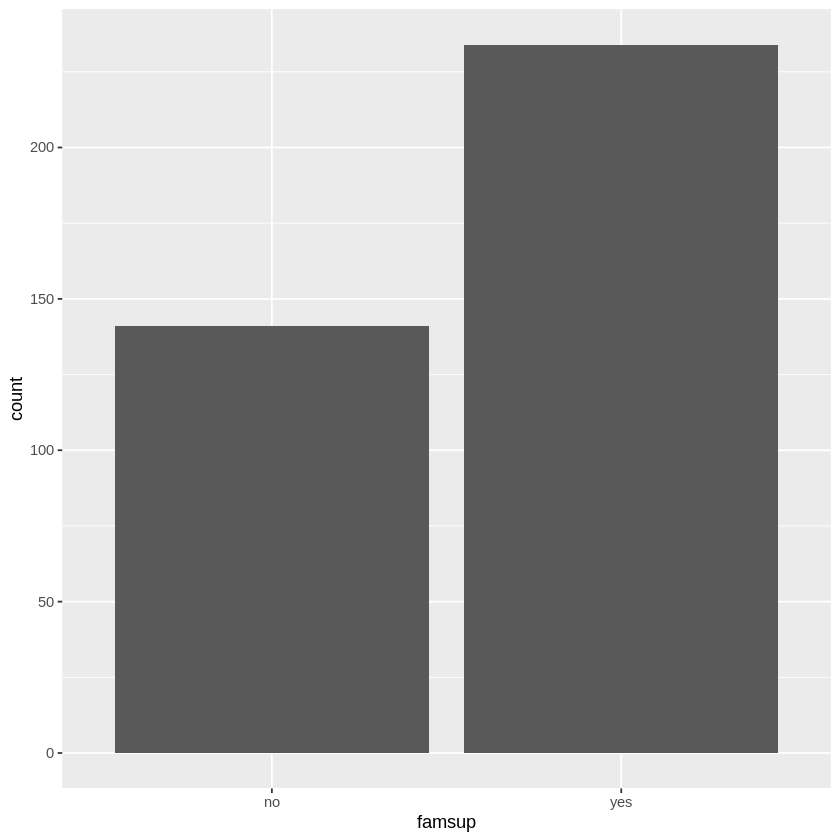

In [ ]:
ggplot(university, aes(x = famsup)) +
  geom_bar()